<a href="https://colab.research.google.com/github/Landhep11/Mathtools/blob/main/tugas04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

#data set link
dataset = pd.read_csv("https://raw.githubusercontent.com/Landhep11/Mathtools/main/customer_data.csv");

In [ ]:
# Menampilkan data di table
pd.DataFrame(dataset)

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,0,58988196,5,1289.0,1,173000.0,2,15,5,112,3,350702,200.000000
1121,0,58987926,5,NaN,2,50000.0,2,15,5,108,4,450000,169.000000
1122,0,58995381,7,1220.0,3,76000.0,2,11,2,90,5,71002,1.000000
1123,0,58998054,4,1250.0,3,137000.0,2,8,5,90,5,72000,1.000000


In [ ]:
# Statistik Data
dataset.describe()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
count,1125.000000,1.125000e+03,1125.000000,976.000000,1125.000000,1.125000e+03,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000
mean,0.200000,5.783677e+07,5.482667,1283.911373,2.333333,1.208836e+05,1.928889,10.872000,4.832889,100.802667,4.195556,164618.495111,134.999004
std,0.400178,1.817150e+06,1.383338,51.764022,0.878773,8.844523e+04,0.257125,2.676437,2.971182,11.988955,0.855679,152520.488281,112.616798
min,0.000000,5.498235e+07,1.000000,1116.500000,1.000000,1.500000e+04,1.000000,3.000000,-1.000000,64.000000,1.000000,60000.000000,1.000000
25%,0.000000,5.499050e+07,4.000000,1244.000000,1.000000,7.200000e+04,2.000000,8.000000,5.000000,90.000000,3.000000,60044.000000,1.000000
50%,0.000000,5.898975e+07,5.000000,1281.500000,3.000000,1.020000e+05,2.000000,11.000000,5.000000,105.000000,4.000000,72000.000000,173.205081
75%,0.000000,5.899799e+07,7.000000,1314.500000,3.000000,1.390000e+05,2.000000,11.000000,5.000000,111.000000,5.000000,151307.000000,202.484567
max,1.000000,5.900624e+07,7.000000,1481.000000,3.000000,1.200000e+06,2.000000,16.000000,10.000000,115.000000,5.000000,650070.000000,707.106781


In [ ]:
# Data Description

# Menghapus kolom yang tidak perlu
dataset = dataset.drop(columns='label')

In [ ]:
# Mengecek Tipe data dan count data dari setiap kolom
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      1125 non-null   int64  
 1   fea_1   1125 non-null   int64  
 2   fea_2   976 non-null    float64
 3   fea_3   1125 non-null   int64  
 4   fea_4   1125 non-null   float64
 5   fea_5   1125 non-null   int64  
 6   fea_6   1125 non-null   int64  
 7   fea_7   1125 non-null   int64  
 8   fea_8   1125 non-null   int64  
 9   fea_9   1125 non-null   int64  
 10  fea_10  1125 non-null   int64  
 11  fea_11  1125 non-null   float64
dtypes: float64(3), int64(9)
memory usage: 105.6 KB


In [ ]:
# Mengecek Missing Value

print(dataset.isnull())

# Mengecek keseluruhan data jika ada valua yang NULL
print(dataset.isnull().any())

# summerize missing value
print (dataset.isna().sum())

      label     id  fea_1  fea_2  fea_3  fea_4  fea_5  fea_6  fea_7  fea_8  \
0     False  False  False  False  False  False  False  False  False  False   
1     False  False  False  False  False  False  False  False  False  False   
2     False  False  False  False  False  False  False  False  False  False   
3     False  False  False  False  False  False  False  False  False  False   
4     False  False  False   True  False  False  False  False  False  False   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1120  False  False  False  False  False  False  False  False  False  False   
1121  False  False  False   True  False  False  False  False  False  False   
1122  False  False  False  False  False  False  False  False  False  False   
1123  False  False  False  False  False  False  False  False  False  False   
1124  False  False  False  False  False  False  False  False  False  False   

      fea_9  fea_10  fea_11  
0     False   False   False  
1  

In [ ]:
# perbaikan data terhadap data yang null
dataset['fea_2'] = dataset['fea_2'].fillna(dataset['fea_2'].mean())
pd.DataFrame(dataset['fea_2'])

dataset.isna().sum()

label     0
id        0
fea_1     0
fea_2     0
fea_3     0
fea_4     0
fea_5     0
fea_6     0
fea_7     0
fea_8     0
fea_9     0
fea_10    0
fea_11    0
dtype: int64

In [ ]:
# Mengecek apakah ada data < 0
# Jika ada data < 0 maka data tersebut tidak valid

temp = []
for column in dataset.columns:
  if dataset[column].dtype != 'object':
    temp.append({'column': column, 'count': len(np.where(dataset[column] < 0)[0])})
pd.DataFrame(temp)

,column,count
0,label,0
1,id,0
2,fea_1,0
3,fea_2,0
4,fea_3,0
5,fea_4,0
6,fea_5,0
7,fea_6,0
8,fea_7,170
9,fea_8,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


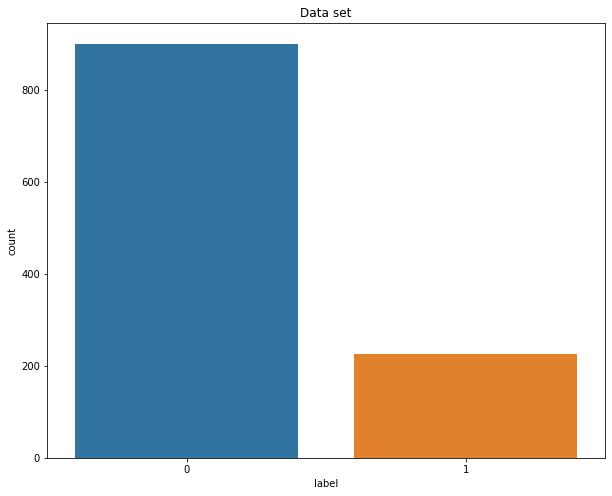

Count Not label:  900
Count label:  225


In [ ]:
# Transformasi data ke dalam bentuk bar plot

ax=plt.subplots(1,1,figsize=(10,8))
seaborn.countplot('label',data=dataset)
plt.title("Data set")
plt.show()

not_label  = np.where(dataset['label'] == 0)
label  = np.where(dataset['label'] == 1)


print("Count Not label: ", len(not_label[0]))

print("Count label: ", len(label[0]))